In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DADOS = '..\dados\Mall_customers_sem_CustumerID_Clustered.csv'
df_clustered = pd.read_csv(DADOS)

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [2]:
from joblib import load
MODELO = '..\modelos\kmeans.pkl'
kmeans = load(MODELO)


In [3]:
kmeans.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [4]:
df_clustered.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')

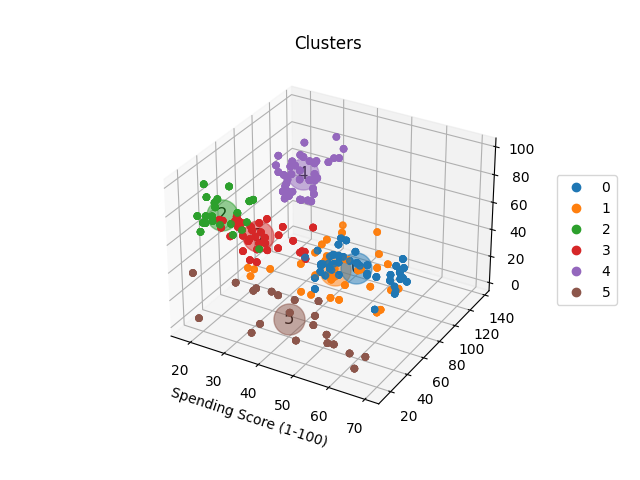

In [5]:
%matplotlib  ipympl
from matplotlib.colors import ListedColormap 

fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

centroids = kmeans.cluster_centers_

cores = plt.cm.tab10.colors[:6]
cores = ListedColormap(cores)


x = df_clustered.Age 
y = df_clustered['Annual Income (k$)']
z = df_clustered['Spending Score (1-100)']

mostrar_centroids = True
mostrar_pontos = True


for i ,centroid in enumerate(centroids):

    if mostrar_centroids:
        ax.scatter(*centroid,s=500,alpha = 0.5)
        ax.text(*centroid,f'{i}',fontsize = 12,horizontalalignment ='center' , verticalalignment = 'center')
    
    if mostrar_pontos:
        s = ax.scatter(x,y,z,c=df_clustered.Cluster,cmap = cores)
        ax.legend(*s.legend_elements(),bbox_to_anchor = (1.3,0.7))
    

ax.set_xlabel('Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_xlabel('Spending Score (1-100)')
ax.set_title('Clusters')
plt.show()

In [16]:
#Criando uma função para o gráfico
def visualizar_cluster(centroid = True , pontos = True):
    
    %matplotlib  ipympl
    fig = plt.figure()

    ax = fig.add_subplot(111,projection='3d')

    centroids = kmeans.cluster_centers_

    cores = plt.cm.tab10.colors[:6]
    cores = ListedColormap(cores)


    x = df_clustered.Age 
    y = df_clustered['Annual Income (k$)']
    z = df_clustered['Spending Score (1-100)']

    mostrar_centroids = centroid
    mostrar_pontos = pontos


    for i ,centroid in enumerate(centroids):

        if mostrar_centroids:
            ax.scatter(*centroid,s=500,alpha = 0.5)
            ax.text(*centroid,f'{i}',fontsize = 12,horizontalalignment ='center' , verticalalignment = 'center')
        
        if mostrar_pontos:
            s = ax.scatter(x,y,z,c=df_clustered.Cluster,cmap = cores)
            ax.legend(*s.legend_elements(),bbox_to_anchor = (1.3,0.7))
        

    ax.set_xlabel('Age')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_xlabel('Spending Score (1-100)')
    ax.set_title('Clusters')
    plt.show()

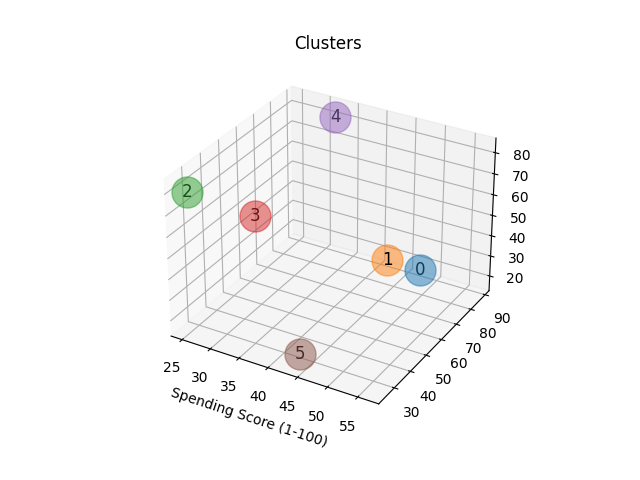

In [17]:
visualizar_cluster(centroid=1,pontos=0)